# Uvod

Duboko učenje je grana mašinskog učenja koja se bavi proučavanjem i razvojem algoritama koji koriste neuronske mreže sa više slojeva (takozvane duboke neuronske mreže) za rešavanje različitih problema. Ovi algoritmi pokušavaju da nauče složene reprezentacije podataka koristeći hijerarhijske arhitekture koje se sastoje od više nivoa transformacija podataka.

Glavna karakteristika dubokog učenja je sposobnost automatskog učenja diskriminativnih značajki iz sirovih podataka. Umesto da se značajke ručno ekstraktuju ili projektuju od strane stručnjaka, duboke neuronske mreže mogu naučiti značajke direktno iz podataka, što ih čini izuzetno moćnim alatima za obradu podataka.

Ovaj projekat ima za cilj razvoj modela mašinskog učenja koji će automatski prepoznati godine, pol i emocionalno stanje pojedinca na osnovu slike njihovog lica.

Za obuku i evaluaciju modela koristiće se odgovarajući set podataka koji sadrži slike lica. Ovaj set podataka će nam omogućiti da razvijemo modele koji mogu efikasno prepoznati i klasifikovati karakteristike lica.

Kao rezultat projekta očekuje se da će razvijeni modeli postići visoku tačnost u prepoznavanju godina, pola i emocija sa lica. Ovi rezultati mogu imati praktičnu primenu u različitim oblastima, poput računarske vizije, medicinske dijagnostike i analize društvenih medija.


# Pripremanje podataka

Instalacija gdown biblioteke za preuzimanje datoteka putem url-a.

In [ ]:
!pip install gdown

Preuzimanje dataset-a.

In [ ]:

import gdown

url = 'https://drive.google.com/u/0/uc?id=1Sbwl656XDOQt2uvsqBFM_XGADCWTEZlH'
output = '/content/imdb.zip'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/u/0/uc?id=1Sbwl656XDOQt2uvsqBFM_XGADCWTEZlH
From (redirected): https://drive.google.com/uc?id=1Sbwl656XDOQt2uvsqBFM_XGADCWTEZlH&confirm=t&uuid=fb2c25cc-5d9a-4cce-8e65-b7833207b307
To: /content/imdb.zip
100%|██████████| 716M/716M [00:10<00:00, 66.5MB/s]


'/content/imdb.zip'

Potrebno je unzip-ovati direktoriujum.

In [ ]:
!unzip imdb.zip

Streaming output truncated to the last 5000 lines.
  inflating: wiki_crop/91/7259691_1983-04-27_2012.jpg  
  inflating: wiki_crop/91/7287691_1979-08-29_2012.jpg  
  inflating: wiki_crop/91/7294591_1987-12-25_2011.jpg  
  inflating: wiki_crop/91/731591_1964-07-17_2008.jpg  
  inflating: wiki_crop/91/739691_1956-09-20_2011.jpg  
  inflating: wiki_crop/91/741791_1917-12-18_2004.jpg  
  inflating: wiki_crop/91/743391_1954-03-15_2015.jpg  
  inflating: wiki_crop/91/7464891_1984-09-30_2013.jpg  
  inflating: wiki_crop/91/7534191_1983-04-17_2010.jpg  
  inflating: wiki_crop/91/763791_1934-12-30_1990.jpg  
  inflating: wiki_crop/91/7671891_1987-03-02_2006.jpg  
  inflating: wiki_crop/91/7711491_1982-12-06_2014.jpg  
  inflating: wiki_crop/91/77491_1916-04-05_1948.jpg  
  inflating: wiki_crop/91/779591_1953-03-01_2014.jpg  
  inflating: wiki_crop/91/7798491_1947-01-25_2013.jpg  
 extracting: wiki_crop/91/783791_1917-06-18_1967.jpg  
  inflating: wiki_crop/91/794891_1970-02-12_2011.jpg  
  infla

Učitavanje .mat fajla i omogućavanje pristupa njenim podacima.

In [ ]:
from scipy.io import loadmat

loadmat('/content/wiki_crop/wiki.mat')

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Jan 16 16:25:20 2016',
 '__version__': '1.0',
 '__globals__': [],
 'wiki': array([[(array([[723671, 703186, 711677, ..., 720620, 723893, 713846]], dtype=int32), array([[2009, 1964, 2008, ..., 2013, 2011, 2008]], dtype=uint16), array([[array(['17/10000217_1981-05-05_2009.jpg'], dtype='<U31'),
                 array(['48/10000548_1925-04-04_1964.jpg'], dtype='<U31'),
                 array(['12/100012_1948-07-03_2008.jpg'], dtype='<U29'), ...,
                 array(['09/9998109_1972-12-27_2013.jpg'], dtype='<U30'),
                 array(['00/9999400_1981-12-13_2011.jpg'], dtype='<U30'),
                 array(['80/999980_1954-06-11_2008.jpg'], dtype='<U29')]],
               dtype=object), array([[1., 1., 1., ..., 1., 1., 0.]]), array([[array(['Sami Jauhojärvi'], dtype='<U15'),
                 array(['Dettmar Cramer'], dtype='<U14'),
                 array(['Marc Okrand'], dtype='<U11'), ...,
                 arr

Konvertovanje .mat fajla u .csv format

In [ ]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
import datetime as date
from dateutil.relativedelta import relativedelta

#dat je prikaz kolona u .csv fajlu
cols = ['age', 'gender', 'path', 'face_score1', 'face_score2']

#putanja do wiki.mat fajla
wiki_mat = '/content/wiki_crop/wiki.mat'

#učitavanje .mat fajla
wiki_data = loadmat(wiki_mat)

#brisanje wiki.mat fajla
del wiki_mat

wiki = wiki_data['wiki']

wiki_photo_taken = wiki[0][0][1][0]
wiki_full_path = wiki[0][0][2][0]
wiki_gender = wiki[0][0][3][0]
wiki_face_score1 = wiki[0][0][6][0]
wiki_face_score2 = wiki[0][0][7][0]

wiki_path = []

for path in wiki_full_path:
    wiki_path.append('wiki_crop/' + path[0])

wiki_genders = []

for n in range(len(wiki_gender)):
    if wiki_gender[n] == 1:
        wiki_genders.append('male')
    else:
        wiki_genders.append('female')

wiki_dob = []

for file in wiki_path:
    wiki_dob.append(file.split('_')[2])

wiki_age = []

#računa razliku od datuma rođenja osobe i kada je slika kreirana
for i in range(len(wiki_dob)):
    try:
        d1 = date.datetime.strptime(wiki_dob[i][0:10], '%Y-%m-%d')
        d2 = date.datetime.strptime(str(wiki_photo_taken[i]), '%Y')
        rdelta = relativedelta(d2, d1)
        diff = rdelta.years
    except Exception as ex:
        diff = -1
    wiki_age.append(diff)

final_wiki = np.vstack((wiki_age, wiki_genders, wiki_path, wiki_face_score1, wiki_face_score2)).T

#čuva podatke u formi DataFrame-a, odnosno dvodimenzionalne tabele
final_wiki_df = pd.DataFrame(final_wiki)

final_wiki_df.columns = cols

meta = final_wiki_df

meta = meta[meta['face_score1'] != '-inf']
meta = meta[meta['face_score2'] == 'nan']

meta = meta.drop(['face_score1', 'face_score2'], axis=1)

#genrisanje 100% uzorka
meta = meta.sample(frac=1)

#vrši se konverzija u .csv format
meta.to_csv('meta.csv', index=False)

In [ ]:
data = pd.read_csv('meta.csv')
data.head()

,age,gender,path
0,33,female,wiki_crop/34/1091334_1981-12-28_2015.jpg
1,44,male,wiki_crop/86/11734886_1965-11-13_2010.jpg
2,65,male,wiki_crop/70/40935870_1941-07-10_2007.jpg
3,20,male,wiki_crop/82/24113082_1989-03-10_2010.jpg
4,20,female,wiki_crop/03/32442803_1991-09-14_2012.jpg


U nastavku se vrši priprema skupa podataka za modeliranje procene godina na osnovu slika

In [ ]:
#importovanje neophodnih modula
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

meta = pd.read_csv('meta.csv')
meta = meta.drop(['gender'], axis=1) #uklanja se kolona 'gender'
meta = meta[meta['age'] >= 0] #filtriraju se redovi DataFrame-a tako da se zadrže samo oni čija vrednost u koloni 'age' nije negativna
meta = meta[meta['age'] <= 101] #dodatno se filtriraju redovi DataFrame-a tako da se zadrže samo oni čija vrednost u koloni 'age' nije veća od 101
meta = meta.values

D_train, D_test = train_test_split(meta, test_size=0.2, random_state=42) #podela skupa podataka na trening i testni skup


In [ ]:
# Kreiranje direktorijuma
for i in range(102):
    output_dir_train_male = 'dataset/age/train/' + str(i)
    output_dir_train_female = 'dataset/age/train/' + str(i)

    if not os.path.exists(output_dir_train_male):
        os.makedirs(output_dir_train_male)

    if not os.path.exists(output_dir_train_female):
        os.makedirs(output_dir_train_female)

    output_dir_test_male = 'dataset/age/test/' + str(i)
    output_dir_test_female = 'dataset/age/test/' + str(i)

    if not os.path.exists(output_dir_test_male):
        os.makedirs(output_dir_test_male)

    if not os.path.exists(output_dir_test_female):
        os.makedirs(output_dir_test_female)


In [ ]:
# Kreiranje trening skupa slika
counter = 0
for image in D_train:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/train/' + str(image[0]) + '/' + str(counter) + '.jpg', img)
    print('Processing : '+str(counter) +' Image : ' + str(image[0]))
    counter += 1


Streaming output truncated to the last 5000 lines.
Processing : 27129 Image : 17
Processing : 27130 Image : 19
Processing : 27131 Image : 90
Processing : 27132 Image : 40
Processing : 27133 Image : 31
Processing : 27134 Image : 30
Processing : 27135 Image : 52
Processing : 27136 Image : 24
Processing : 27137 Image : 49
Processing : 27138 Image : 33
Processing : 27139 Image : 38
Processing : 27140 Image : 27
Processing : 27141 Image : 24
Processing : 27142 Image : 89
Processing : 27143 Image : 51
Processing : 27144 Image : 42
Processing : 27145 Image : 58
Processing : 27146 Image : 22
Processing : 27147 Image : 57
Processing : 27148 Image : 70
Processing : 27149 Image : 15
Processing : 27150 Image : 19
Processing : 27151 Image : 32
Processing : 27152 Image : 26
Processing : 27153 Image : 22
Processing : 27154 Image : 19
Processing : 27155 Image : 42
Processing : 27156 Image : 23
Processing : 27157 Image : 18
Processing : 27158 Image : 26
Processing : 27159 Image : 47
Processing : 27160 

In [ ]:
# Kreiranje testnog skupa slika
counter = 0
for image in D_test:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    cv2.imwrite('dataset/age/test/' + str(image[0]) +  '/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1


Streaming output truncated to the last 5000 lines.
Processing: 3033 Image: 55
Processing: 3034 Image: 17
Processing: 3035 Image: 21
Processing: 3036 Image: 48
Processing: 3037 Image: 20
Processing: 3038 Image: 56
Processing: 3039 Image: 27
Processing: 3040 Image: 21
Processing: 3041 Image: 32
Processing: 3042 Image: 42
Processing: 3043 Image: 22
Processing: 3044 Image: 45
Processing: 3045 Image: 45
Processing: 3046 Image: 85
Processing: 3047 Image: 18
Processing: 3048 Image: 29
Processing: 3049 Image: 45
Processing: 3050 Image: 46
Processing: 3051 Image: 42
Processing: 3052 Image: 60
Processing: 3053 Image: 49
Processing: 3054 Image: 24
Processing: 3055 Image: 63
Processing: 3056 Image: 25
Processing: 3057 Image: 22
Processing: 3058 Image: 35
Processing: 3059 Image: 46
Processing: 3060 Image: 45
Processing: 3061 Image: 23
Processing: 3062 Image: 28
Processing: 3063 Image: 28
Processing: 3064 Image: 28
Processing: 3065 Image: 27
Processing: 3066 Image: 52
Processing: 3067 Image: 29
Proc

# Kreiranje modela
U nastavku se izvršavaju treninzi, odnosno kreiraju se modeli za prepoznavanje pola i godina. Prvo se kreira model za prepoznavanje pola.

In [ ]:
!pip install tensorflow
!pip install keras_applications

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split

meta = pd.read_csv('meta.csv')

In [ ]:
#ovde se briše kolona age, u prethodnoj ćeliji smo brisali kolonu gender
meta = meta.drop(['age'], axis=1)

#deli se dataset u odnosu 90% - 10%
D_train, D_test = train_test_split(meta, test_size=0.1, random_state=42)

In [ ]:
#kako ne bi dolazilo do problema, usled nejednakosti u broju slika muškog i ženskog pola
#selektuje se isti broj slika u trening skupu
D_train_male = D_train[D_train['gender'] == 'male']
D_train_female = D_train[D_train['gender'] == 'female']

no_male = len(D_train_male)
no_female = len(D_train_female)

extra = D_train_male[no_female:]
D_train_male = D_train_male[0:no_female]

D_test = pd.concat((D_test, extra))

D_train = pd.concat((D_train_male, D_train_female))


In [ ]:
#shuffling dataseta - uzeće i izmešati ceo dataset
D_train = D_train.sample(frac=1)
D_test = D_test.sample(frac=1)

In [ ]:
#kreiraju se neophodni direktorijumi
output_dir_train_male = 'dataset/gender/train/male'
output_dir_train_female = 'dataset/gender/train/female'

if not os.path.exists(output_dir_train_male):
    os.makedirs(output_dir_train_male)

if not os.path.exists(output_dir_train_female):
    os.makedirs(output_dir_train_female)

output_dir_test_male = 'dataset/gender/test/male'
output_dir_test_female = 'dataset/gender/test/female'

if not os.path.exists(output_dir_test_male):
    os.makedirs(output_dir_test_male)

if not os.path.exists(output_dir_test_female):
    os.makedirs(output_dir_test_female)

In [ ]:
#učitavanje slika u testni i trening skup
counter = 0

for image in D_train.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/train/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/train/female/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

counter = 0

for image in D_test.values:
    img = cv2.imread(image[1], 1)
    img = cv2.resize(img, (128,128))
    if image[0] == 'male':
        cv2.imwrite('dataset/gender/test/male/' + str(counter) + '.jpg', img)
    else:
        cv2.imwrite('dataset/gender/test/female/' + str(counter) + '.jpg', img)
    print('Processing: '+str(counter) +' Image: ' + str(image[0]))
    counter += 1

Streaming output truncated to the last 5000 lines.
Processing: 16356 Image: male
Processing: 16357 Image: male
Processing: 16358 Image: male
Processing: 16359 Image: male
Processing: 16360 Image: male
Processing: 16361 Image: male
Processing: 16362 Image: male
Processing: 16363 Image: male
Processing: 16364 Image: male
Processing: 16365 Image: male
Processing: 16366 Image: female
Processing: 16367 Image: male
Processing: 16368 Image: male
Processing: 16369 Image: male
Processing: 16370 Image: female
Processing: 16371 Image: male
Processing: 16372 Image: male
Processing: 16373 Image: male
Processing: 16374 Image: female
Processing: 16375 Image: male
Processing: 16376 Image: female
Processing: 16377 Image: male
Processing: 16378 Image: male
Processing: 16379 Image: male
Processing: 16380 Image: male
Processing: 16381 Image: male
Processing: 16382 Image: male
Processing: 16383 Image: male
Processing: 16384 Image: male
Processing: 16385 Image: male
Processing: 16386 Image: male
Processing:

In [ ]:
#Instalacija TensorFlow-a i keras_applications biblioteke
!pip install tensorflow
!pip install keras_applications

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.preprocessing.image import ImageDataGenerator

#arhitektura se zasniva na sekvenci slojeva modela
#sekvencijalni model, koji podrazumjeva niz slojeva modela
model = Sequential()

In [ ]:
#MobileNetV2 jeste sledeći model koji se koristi
#model koji je učitan sa težinama koje su unapred učitane u ImageNet-u
mobile = MobileNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(128,128,3),
                          pooling="max")

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
#mobile model se dodaje i konfiguriše se output sloj
#Dense je sloj neuronske mreže koji ima dva neurona, a tip funkcije koja ga aktivira je softmax
model.add(mobile)
model.add(Dense(units=2, activation="softmax"))

#model se kompajlira i navode se optimizatori
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

#podaci o modelu se print-uju
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Func  (None, 1280)              2257984   
 tional)                                                         
                                                                 
 dense_1 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2226434 (8.49 MB)
Non-trainable params: 34112 (133.25 KB)
_________________________________________________________________
None


In [ ]:
#koristi se ImageDataGenerator klasa za data augmentaciju
#omogućenje augmentacije dok se model trenira, tako što rotira/zumira slike
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#čita se trening skup
#navodi se dimenzija treniranja
#categorical - je zapravo 2D niz one-hot labela
train_generator = train_datagen.flow_from_directory('dataset/gender/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#čita se testni skup
test_set = test_datagen.flow_from_directory('dataset/gender/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 18860 images belonging to 2 classes.
Found 21356 images belonging to 2 classes.


In [ ]:
#za bolje rezultate vrši se prilagođavanje epohe
history1 = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 424s 4s/step - loss: 0.8988 - accuracy: 0.6984 - val_loss: 0.6319 - val_accuracy: 0.7931
Epoch 2/10
100/100 [==============================] - 394s 4s/step - loss: 0.6159 - accuracy: 0.7831 - val_loss: 0.5848 - val_accuracy: 0.8050
Epoch 3/10
100/100 [==============================] - 393s 4s/step - loss: 0.5391 - accuracy: 0.8110 - val_loss: 0.6585 - val_accuracy: 0.7688
Epoch 4/10
100/100 [==============================] - 392s 4s/step - loss: 0.5250 - accuracy: 0.8141 - val_loss: 0.5733 - val_accuracy: 0.7997
Epoch 5/10
100/100 [==============================] - 395s 4s/step - loss: 0.4927 - accuracy: 0.8245 - val_loss: 0.5970 - val_accuracy: 0.7837
Epoch 6/10
100/100 [==============================] - 391s 4s/step - loss: 0.4593 - accuracy: 0.8378 - val_loss: 0.5798 - val_accuracy: 0.7937
Epoch 7/10
100/100 [==============================] - 379s 4s/step - loss: 0.4453 - accuracy: 0.8431 - val_loss: 0.5239 - val_accuracy: 0.8119

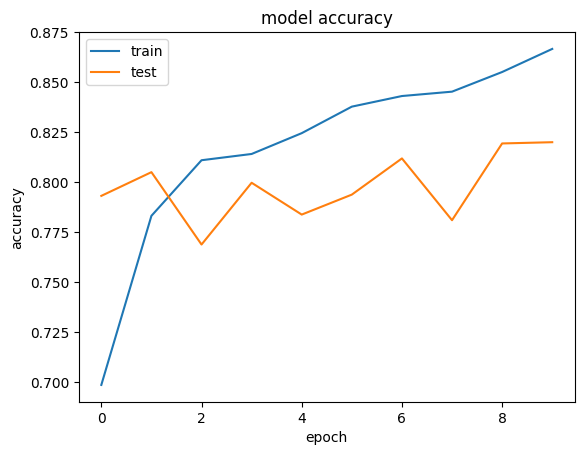

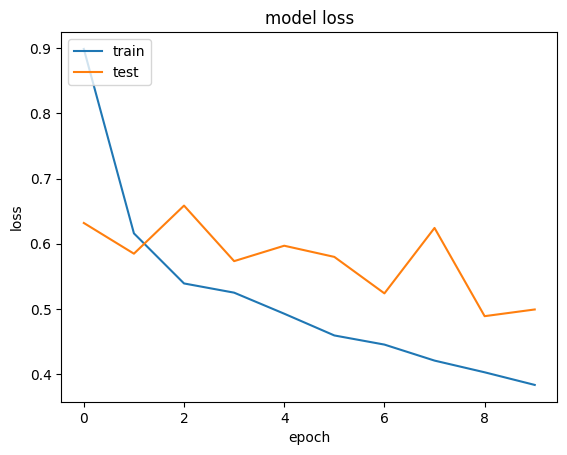

In [ ]:
#nakon što izvršavanje završeno radi se analiza performansi modela
import matplotlib.pyplot as plt

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import os

# Putanja do direktorijuma koji sadrži slike
direktorij_slika = '/content/dataset/age/test/50'

# Lista za pohranu imena slika
imena_slika = []

# Iteriraj kroz datoteke u direktoriju
for ime_datoteke in os.listdir(direktorij_slika):
    # Proveri da li je datoteka slika (po ekstenziji)
    if ime_datoteke.endswith('.jpg') or ime_datoteke.endswith('.png'):
        # Dodaj ime slike u listu
        imena_slika.append(ime_datoteke)

# Ispiši imena slika
print("Imena slika u direktorijumu:")
for ime_slike in imena_slika:
    print(ime_slike)


Imena slika u direktoriju:
6908.jpg
1669.jpg
5956.jpg
471.jpg
5339.jpg
6973.jpg
3494.jpg
4018.jpg
4433.jpg
6381.jpg
2398.jpg
5900.jpg
5921.jpg
4218.jpg
409.jpg
1301.jpg
445.jpg
3205.jpg
5497.jpg
2311.jpg
5131.jpg
5343.jpg
4283.jpg
5280.jpg
7943.jpg
4748.jpg
1029.jpg
4435.jpg
5383.jpg
5667.jpg
7913.jpg
1351.jpg
7364.jpg
5416.jpg
1349.jpg
7977.jpg
4249.jpg
7436.jpg
5336.jpg
8000.jpg
7926.jpg
86.jpg
8012.jpg
406.jpg
2674.jpg
962.jpg
2630.jpg
6595.jpg
4397.jpg
5757.jpg
4376.jpg
4706.jpg
5245.jpg
5504.jpg
7033.jpg
1423.jpg
4623.jpg
2638.jpg
1400.jpg
2775.jpg
6846.jpg
1978.jpg
3243.jpg
7481.jpg
7631.jpg
1713.jpg
2841.jpg
2178.jpg
4093.jpg
3965.jpg
5461.jpg
326.jpg
5390.jpg
7758.jpg
7073.jpg
795.jpg
6311.jpg
837.jpg
5449.jpg
7812.jpg
3407.jpg
4128.jpg
4234.jpg
4568.jpg
3800.jpg
1047.jpg
1374.jpg
2106.jpg
4382.jpg
6836.jpg
3481.jpg
7021.jpg
4444.jpg
5597.jpg
4715.jpg
4033.jpg


1/1 [==============================] - 0s 37ms/step


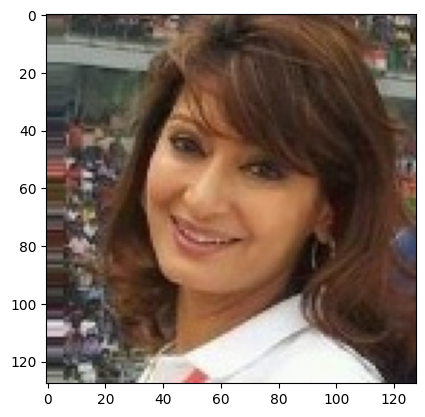

Zensko


In [ ]:
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(128, 128))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis=0)
    test_img /= 255
    return test_img

# Putanja do slike "7397.jpg"
picture = '/content/dataset/age/test/50/6846.jpg'

# Predikcija spola
gender_pred = model.predict(loadImage(picture))

# Učitavanje slike i prikaz
img = image.load_img(picture)
plt.imshow(img)
plt.show()

# Ispis predikcije
if gender_pred[0][0] < gender_pred[0][1]:
    print('Musko')
else:
    print('Zensko')


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.preprocessing.image import ImageDataGenerator

#kreiranje sekvencijalnog modela
model2 = Sequential()

#drugi tip modela koji se koristi InceptionResNetV2
mobile = InceptionResNetV2(include_top=False,
                          weights="imagenet",
                          input_shape=(128,128,3),
                          pooling="max")

In [ ]:
#dodaje se mobile model
#sloj neuronske mreže sa 102 neurona i tip funkcije aktivacije je softmax
model2.add(mobile)
model2.add(Dense(units=102, activation="softmax"))

#model se kompajlira i navode se optimizatori
model2.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(learning_rate=2e-5), metrics=['accuracy'])

#prikaz podataka
print(model2.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Funct  (None, 1536)              54336736  
 ional)                                                          
                                                                 
 dense_4 (Dense)             (None, 102)               156774    
                                                                 
Total params: 54493510 (207.88 MB)
Trainable params: 54432966 (207.65 MB)
Non-trainable params: 60544 (236.50 KB)
_________________________________________________________________
None


In [ ]:
#ImageDataGenerator se koristi za augmentaciju, koja se primenjuje dok se model trenira
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#trening skup se čita
train_generator = train_datagen.flow_from_directory('dataset/age/train',
                                                    target_size=(128, 128),
                                                    batch_size=64,
                                                    class_mode='categorical')
#testni skup se iščitava
test_set = test_datagen.flow_from_directory('dataset/age/test',
                                            target_size=(128, 128),
                                            batch_size=64,
                                            class_mode='categorical')

Found 32129 images belonging to 102 classes.
Found 8033 images belonging to 102 classes.


In [ ]:
#zbog performansi se prilagođavaju epohe
history2 = model2.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=10,
                    validation_data=test_set,
                    validation_steps=25)

Epoch 1/10
100/100 [==============================] - 2230s 21s/step - loss: 4.7041 - accuracy: 0.0255 - val_loss: 4.6616 - val_accuracy: 0.0275
Epoch 2/10
100/100 [==============================] - 2107s 21s/step - loss: 4.3120 - accuracy: 0.0372 - val_loss: 4.2481 - val_accuracy: 0.0312
Epoch 3/10
100/100 [==============================] - 2094s 21s/step - loss: 4.1533 - accuracy: 0.0395 - val_loss: 4.1483 - val_accuracy: 0.0350
Epoch 4/10
100/100 [==============================] - 2069s 21s/step - loss: 4.0621 - accuracy: 0.0418 - val_loss: 4.0605 - val_accuracy: 0.0350
Epoch 5/10
100/100 [==============================] - 2092s 21s/step - loss: 3.9851 - accuracy: 0.0459 - val_loss: 4.0374 - val_accuracy: 0.0444
Epoch 6/10
100/100 [==============================] - 2098s 21s/step - loss: 3.9519 - accuracy: 0.0470 - val_loss: 4.0541 - val_accuracy: 0.0406
Epoch 7/10
100/100 [==============================] - 2070s 21s/step - loss: 3.9040 - accuracy: 0.0500 - val_loss: 4.0919 - val_ac

In [ ]:
#model se čuva
model2.save('weights/age_inception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


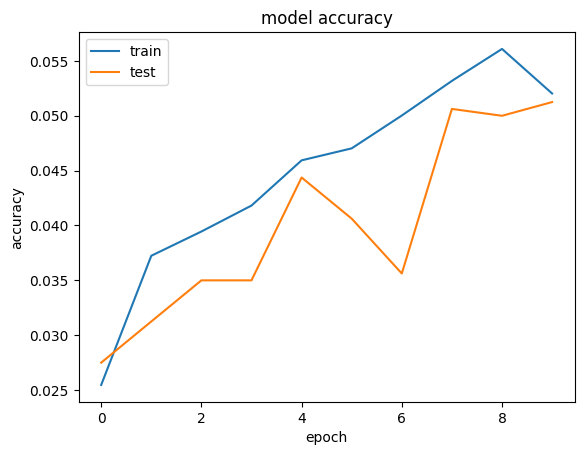

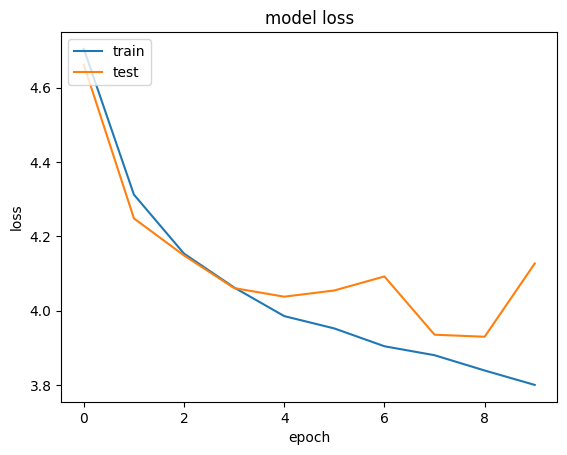

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 195ms/step


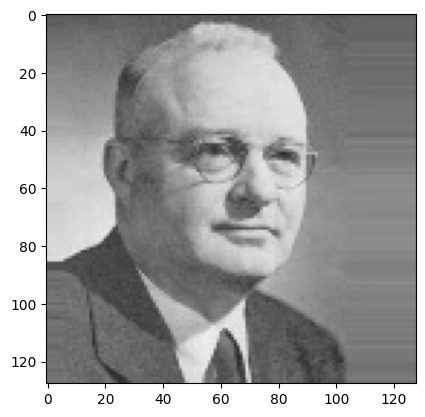

51
50-74 godina


In [ ]:
#rezultati se proveravaju
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
  test_img = image.load_img(filepath, target_size=(128, 128))
  test_img = image.img_to_array(test_img)
  test_img = np.expand_dims(test_img, axis = 0)
  test_img /= 255
  return test_img

picture = '/content/dataset/age/test/50/6836.jpg'
age_pred= model2.predict(loadImage(picture))
img = image.load_img(picture)
plt.imshow(img)
plt.show()
max=-1
count=0

for i in age_pred[0]:
  if i>max:
    max = i
    temp = count
  count+=1

print(temp)
if temp in range(0, 24):
  print('0-24 godina')
if temp in range(25, 49):
  print('25-49 godina')
if temp in range(50, 74):
  print('50-74 godina')
if temp in range(75, 99):
  print('75-99 godina')
if temp in range(91, 101):
  print('91-101 godina')

In [ ]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 912.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 7.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=9f206bd81e7ce89400bf696ed34cb9cd6927344c7caa30990245c68a15ded101
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


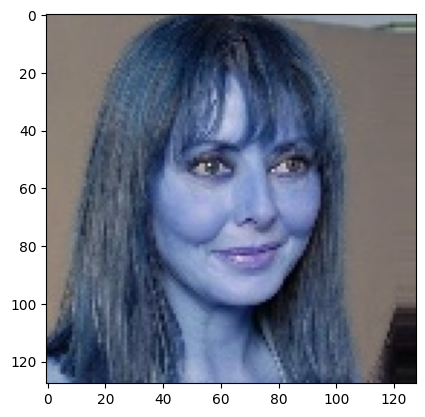

In [ ]:
import cv2
from deepface import DeepFace
img = cv2.imread('/content/dataset/age/test/50/4444.jpg')
import matplotlib.pyplot as plt
plt.imshow(img)

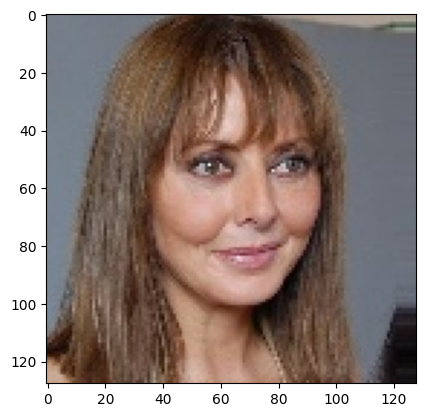

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) #vraćanje slike na prirodan ten

In [ ]:
predictions = DeepFace.analyze(img) #analiza slike

Action: emotion:   0%|          | 0/4 [00:00<?, ?it/s]

24-04-01 15:49:32 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5

  0%|          | 0.00/5.98M [00:00<?, ?B/s]
 18%|█▊        | 1.05M/5.98M [00:00<00:00, 9.11MB/s]
 44%|████▍     | 2.62M/5.98M [00:00<00:00, 12.6MB/s]
100%|██████████| 5.98M/5.98M [00:00<00:00, 15.8MB/s]
Action: age:  25%|██▌       | 1/4 [00:02<00:07,  2.38s/it]    

24-04-01 15:49:40 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  1%|          | 3.15M/539M [00:00<00:17, 31.2MB/s]
  4%|▍         | 21.0M/539M [00:00<00:04, 117MB/s] 
  7%|▋         | 38.3M/539M [00:00<00:03, 143MB/s]
 10%|█         | 54.5M/539M [00:00<00:03, 150MB/s]
 13%|█▎        | 69.7M/539M [00:00<00:03, 145MB/s]
 16%|█▌        | 87.0M/539M [00:00<00:02, 153MB/s]
 19%|█▉        | 103M/539M [00:00<00:02, 155MB/s] 
 22%|██▏       | 120M/539M [00:00<00:02, 158MB/s]
 26%|██▌       | 138M/539M [00:00<00:02, 163MB/s]
 29%|██▊       | 155M/539M [00:01<00:02, 158MB/s]
 32%|███▏      | 171M/539M [00:01<00:02, 159MB/s]
 35%|███▍      | 188M/539M [00:01<00:02, 161MB/s]
 38%|███▊      | 204M/539M [00:01<00:02, 159MB/s]
 41%|████      | 222M/539M [00:01<00:01, 164MB/s]
 44%|████▍     | 239M/539M [00:01<00:01, 165MB/s]
 47%|████▋     | 255M/539M [00:01<00:01

24-04-01 15:49:52 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  0%|          | 1.05M/537M [00:00<00:52, 10.3MB/s]
  1%|          | 3.15M/537M [00:00<00:35, 15.1MB/s]
  1%|          | 5.77M/537M [00:00<00:27, 19.0MB/s]
  2%|▏         | 9.44M/537M [00:00<00:21, 24.4MB/s]
  3%|▎         | 14.2M/537M [00:00<00:16, 31.6MB/s]
  4%|▍         | 20.4M/537M [00:00<00:12, 41.3MB/s]
  5%|▌         | 28.8M/537M [00:00<00:09, 54.1MB/s]
  8%|▊         | 40.4M/537M [00:00<00:06, 72.1MB/s]
 10%|█         | 54.5M/537M [00:00<00:05, 92.9MB/s]
 13%|█▎        | 69.2M/537M [00:01<00:04, 109MB/s] 
 16%|█▌        | 86.0M/537M [00:01<00:03, 126MB/s]
 19%|█▉        | 103M/537M [00:01<00:03, 138MB/s] 
 23%|██▎       | 121M/537M [00:01<00:02, 148MB/s]
 26%|██▌       | 138M/537M [00:01<00:02, 154MB/s]
 29%|██▉       | 155M/537M [00:01<00:02, 156MB/s]
 32%|███▏      | 171

24-04-01 15:50:07 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  1%|          | 3.67M/537M [00:00<00:14, 36.1MB/s]
  4%|▍         | 21.5M/537M [00:00<00:04, 119MB/s] 
  7%|▋         | 37.2M/537M [00:00<00:03, 135MB/s]
 10%|▉         | 53.5M/537M [00:00<00:03, 146MB/s]
 13%|█▎        | 68.2M/537M [00:00<00:03, 143MB/s]
 16%|█▌        | 84.4M/537M [00:00<00:03, 149MB/s]
 19%|█▉        | 102M/537M [00:00<00:02, 156MB/s] 
 22%|██▏       | 117M/537M [00:00<00:02, 152MB/s]
 25%|██▍       | 134M/537M [00:00<00:02, 156MB/s]
 28%|██▊       | 150M/537M [00:01<00:02, 155MB/s]
 31%|███       | 167M/537M [00:01<00:02, 157MB/s]
 34%|███▍      | 182M/537M [00:01<00:02, 156MB/s]
 37%|███▋      | 198M/537M [00:01<00:02, 152MB/s]
 40%|████      | 215M/537M [00:01<00:02, 156MB/s]
 43%|████▎     | 231M/537M [00:05<00:22, 13.8MB/s]
 45%|████▌     | 243M/537M

In [ ]:
predictions

[{'emotion': {'angry': 0.0035791336846944573,
   'disgust': 2.477103854220954e-07,
   'fear': 0.0006558516624369837,
   'happy': 96.38149077561333,
   'sad': 0.052984545634158664,
   'surprise': 0.38409139844174356,
   'neutral': 3.1771967280858866},
  'dominant_emotion': 'happy',
  'region': {'x': 31,
   'y': 26,
   'w': 73,
   'h': 73,
   'left_eye': None,
   'right_eye': None},
  'face_confidence': 0.9,
  'age': 36,
  'gender': {'Woman': 100.0, 'Man': 5.461425089947625e-06},
  'dominant_gender': 'Woman',
  'race': {'asian': 0.014067346637602895,
   'indian': 0.013978240895085037,
   'black': 0.00017316567664238391,
   'white': 94.84047889709473,
   'middle eastern': 1.8582077696919441,
   'latino hispanic': 3.273094817996025},
  'dominant_race': 'white'}]

In [ ]:
predictions[0]['dominant_emotion']

'happy'

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x, y, w, h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 2)

array([[[134, 122, 116],
        [136, 124, 118],
        [137, 125, 119],
        ...,
        [144, 154, 171],
        [149, 159, 177],
        [145, 155, 173]],

       [[135, 123, 117],
        [137, 125, 119],
        [137, 125, 119],
        ...,
        [144, 156, 168],
        [146, 158, 170],
        [143, 155, 167]],

       [[136, 124, 118],
        [137, 125, 119],
        [137, 125, 119],
        ...,
        [151, 164, 166],
        [152, 165, 167],
        [152, 165, 167]],

       ...,

       [[144, 165, 197],
        [150, 171, 202],
        [143, 164, 192],
        ...,
        [ 20,  19,  21],
        [ 18,  17,  19],
        [ 19,  18,  20]],

       [[146, 171, 205],
        [147, 169, 204],
        [150, 171, 202],
        ...,
        [ 15,  14,  16],
        [ 15,  14,  16],
        [ 15,  14,  16]],

       [[141, 167, 203],
        [145, 170, 204],
        [142, 165, 197],
        ...,
        [ 20,  19,  21],
        [ 22,  21,  23],
        [ 21,  20,  22]]], dtype=uint8)
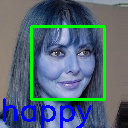

In [ ]:
#dodavanje neophodnog teksta raspoloženja na slici
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            predictions[0]['dominant_emotion'],
            (0,120),
            font,
            1,
            (0, 0, 255),
            2,
            cv2.LINE_4)

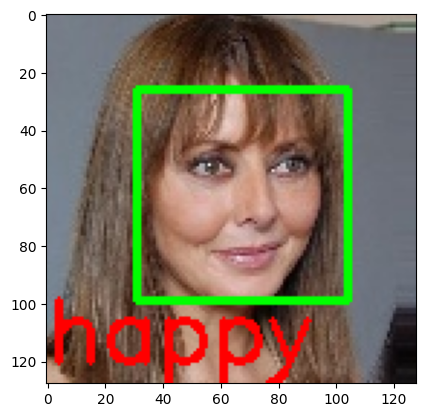

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#Zaključak
Prvi korak projekta, priprema skupa podataka, uključujući učitavanje, filtriranje i podelu podataka na trening i testni skup bio je ključan za stvaranje pouzdanih modela.

Zatim su kreirani modeli za prepoznavanje pola i godina korišćenjem dubokih neuronskih mreža poput MobileNetV2 i InceptionResNetV2. Trenirani modeli su omogućili automatsko prepoznavanje pola i uzrasta na slikama lica.

Za prepoznavanje emocionalnog stanja, korišćena je biblioteka DeepFace za analizu slika lica i ekstrakciju emocionalnih karakteristika. Nakon učitavanja slike, primenjen je algoritam za detekciju lica radi identifikacije regiona od interesa. Zatim su korišćene duboke neuronske mreže kako bi se automatski prepoznala emocionalna stanja na licu.

Kroz izradu projekta, susrela sam se sa nekim problemima, poput odabura odgovarajućeg modela kako bi se postigla visoka tačnost.

U ovom projektu implementirani su sistemi za prepoznavanje uzrasta, pola i emocionalnog stanja ljudi na slikama, pružajući osnovu za razvoj naprednih aplikacija zasnovanih na analizi ljudskih karakteristika. Dalje istraživanje i unapređenje ovih sistema moglo bi doneti šire primene u raznim oblastima.







